## Linear Regression Multiple Variables
***
- Data is about home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.
- find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

In [33]:
# importing essential libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
# loading the data
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,3800,4.0,17,630000
7,2500,3.0,15,590000


In [35]:
# Data Preprocessing: Fill NA values with median value of a column
df.bedrooms.median()

4.0

In [36]:
# using fillna to fill the median value at NaN
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,3800,4.0,17,630000
7,2500,3.0,15,590000


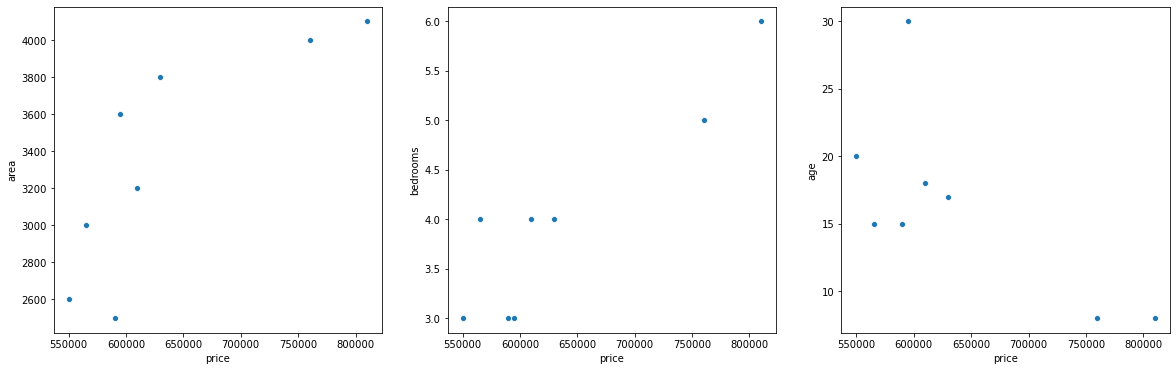

In [37]:
# plotting how price (dependent) is behaving with respect to other independent features
fig, ax = plt.subplots(1,3,figsize=(20,6))
sns.scatterplot(df.price,df.area,ax=ax[0])
sns.scatterplot(df.price,df.bedrooms,ax=ax[1])
sns.scatterplot(df.price,df.age,ax=ax[2])
plt.show()

- by looking at the grapg it is difficult to infere the price. Basically, all these factors combined will give the price. So, we will run a Linear Regression on it.

In [38]:
# splitting the data into X and y
# creating instance of Linear Regression
# and applying Linear Regression

In [39]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [40]:
print("These are the coefficients of area :", reg.coef_[0] , ",", "bedrooms :", reg.coef_[1], ",", "age :", reg.coef_[2])
print("Intecept of the model is :",reg.intercept_)

These are the coefficients of area : 74.10766730350939 , bedrooms : 26229.591400302237 , age : -4287.473981352119
Intecept of the model is : 355778.3353766756


**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [41]:
one = reg.predict([[3000,3,40]])
print("Price of home with 3000 sqr ft area, 3 bedrooms, 40 year old %6.3f US$" % (one))

Price of home with 3000 sqr ft area, 3 bedrooms, 40 year old 485291.152 US$


**Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old**

In [42]:
two = reg.predict([[2500,4,5]])
print("Price of home with 2500 sqr ft area, 4 bedrooms, 5 year old %6.3f US$" % (two))

Price of home with 2500 sqr ft area, 4 bedrooms, 5 year old 624528.499 US$
